# Crypto Gainers Analysis

This project involves scraping data from a website to gather information about the top cryptocurrency gainers, processing this data to extract meaningful insights, and summarizing the occurrences of each cryptocurrency across different months.

## Setup

First, we need to install the necessary packages. Run the following cell to install the required libraries.



In [24]:
# Install required packages
!pip install requests
!pip install beautifulsoup4
!pip install pandas
!pip install matplotlib


## Web Scraping

The following code scrapes data from the website and saves it into a CSV file.


In [30]:
import requests
from bs4 import BeautifulSoup
import csv

# Base URL and search query
base_url = "https://insidebitcoins.com/page/"
search_query = "?s=Top+Crypto+Gainers"

# Total number of pages
total_pages = 22

# Open a CSV file to store the data
with open("top_crypto_gainers.csv", "w", newline='', encoding="utf-8") as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Write header row
    writer.writerow(['Page', 'Title'])

    # Loop through each page
    for page_num in range(1, total_pages + 1):
        # Construct the URL for the current page
        url = f"{base_url}{page_num}{search_query}"

        # Send a GET request to the URL
        response = requests.get(url)

        # Parse HTML
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all the article titles containing the top crypto gainers
        article_titles = soup.find_all('a', class_='article-header-title')

        # Write the titles to the CSV file
        for title in article_titles:
            writer.writerow([page_num, title.text.strip()])

print("Data has been saved to top_crypto_gainers.csv.")


Data has been saved to top_crypto_gainers.csv.


## Data Processing

Next, we process the scraped data to count the occurrences of each cryptocurrency by month and save the summary to a new CSV file.


In [31]:
import pandas as pd

# Load the original CSV file
df = pd.read_csv('top_crypto_gainers.csv')

# Initialize a dictionary to store data for each page
page_data = {}

# Iterate over each row in the CSV
for index, row in df.iterrows():
    page = int(row['Page'])
    title = row['Title']

    # Extract month, day, and cryptocurrencies
    split_title = title.split('Today')
    if len(split_title) > 1:  # Check if the title contains "Today"
        month_day = split_title[1].strip().split()  # Extract month and day
        month = month_day[0]  # Extract month
        day = month_day[1]  # Extract day
        cryptos = [crypto.strip() for crypto in split_title[1].split('–')[1].split(',')]  # Extract cryptocurrencies

        # Update page data dictionary
        if page not in page_data:
            page_data[page] = {'Month': month, 'Day': day, 'Cryptocurrencies': cryptos}
        else:
            page_data[page]['Cryptocurrencies'].extend(cryptos)

# Write the extracted data into a new CSV file
with open('top_crypto_gainers_processed.csv', 'w', newline='') as csvfile:
    fieldnames = ['Page', 'Month', 'Day', 'Cryptocurrency']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    # Write data for each page
    for page, data in page_data.items():
        month = data['Month']
        day = data['Day']
        cryptos = data['Cryptocurrencies']
        for crypto in cryptos:
            writer.writerow({'Page': page, 'Month': month, 'Day': day, 'Cryptocurrency': crypto})

print("Data saved successfully to 'top_crypto_gainers_processed.csv'.")


Data saved successfully to 'top_crypto_gainers_processed.csv'.


## Summarizing Data

We will now summarize the data to count the occurrences of each cryptocurrency across different months.


In [27]:
# Load the processed CSV file into a DataFrame
df_processed = pd.read_csv("top_crypto_gainers_processed.csv")

# Create a pivot table to count the occurrences of each cryptocurrency in each month
pivot_table = df_processed.pivot_table(index='Cryptocurrency', columns='Month', aggfunc='size', fill_value=0)

# Calculate the total count of occurrences for each cryptocurrency across all months
total_count = pivot_table.sum(axis=1)

# Get the list of months
months = pivot_table.columns.tolist()

# Initialize a dictionary to store the months in which each cryptocurrency appeared
months_dict = {}

# Iterate over each cryptocurrency
for crypto in pivot_table.index:
    # Get the months in which the cryptocurrency appeared
    appeared_months = [months[i] for i in range(len(months)) if pivot_table.loc[crypto, months[i]] > 0]
    # Store the months in the dictionary
    months_dict[crypto] = appeared_months

# Create a DataFrame to display the total count of occurrences and the months
result_df = pd.DataFrame({'Total Count': total_count, 'Appeared Months': months_dict})

# Sort the DataFrame by the "Total Count" column in descending order
result_df_sorted = result_df.sort_values(by='Total Count', ascending=False)

# Save the result to a new CSV file
result_df_sorted[['Total Count', 'Appeared Months']].to_csv("Cryptocurrency_Gainers_Summary_Generator.csv", index_label='Cryptocurrency')

print("Data has been saved to 'Cryptocurrency_Gainers_Summary_Generator.csv'.")


Data has been saved to 'Cryptocurrency_Gainers_Summary_Generator.csv'.


## Insights


In [42]:
from tabulate import tabulate

# Insight 1: Variability in Token Growth
insight_1_data = [["Stable tokens:", stable_tokens], ["Variable tokens:", variable_tokens]]

# Insight 2: Monthly Variations
insight_2_data = [["Month with maximum token listings:", max_month], ["Month with minimum token listings:", min_month]]

# Insight 3: Emerging Tokens
insight_3_data = [["Emerging tokens:", emerging_tokens]]

# Insight 4: Stability vs. Volatility
insight_4_data = [["Stable token presence:", stable_presence], ["Volatile token presence:", volatile_presence]]

# Insight 5: Popular Tokens
insight_5_data = [["Popular tokens:", popular_tokens]]

# Insight 6: Clusters of Tokens
insight_6_data = [["Token clusters by month:"]]
for month, tokens in token_clusters.items():
    insight_6_data.append([month, ', '.join(tokens)])

# Insight 7: Total Token Count
insight_7_data = [["Total token count by month:"]]
for month, count in total_token_count.items():
    insight_7_data.append([month, count])

# Display insights as tables
print("Insight 1: Variability in Token Growth")
print(tabulate(insight_1_data, headers=["Insight", "Data"]))
print()

print("Insight 2: Monthly Variations")
print(tabulate(insight_2_data, headers=["Insight", "Data"]))
print()

print("Insight 3: Emerging Tokens")
print(tabulate(insight_3_data, headers=["Insight", "Data"]))
print()

print("Insight 4: Stability vs. Volatility")
print(tabulate(insight_4_data, headers=["Insight", "Data"]))
print()

print("Insight 5: Popular Tokens")
print(tabulate(insight_5_data, headers=["Insight", "Data"]))
print()

print("Insight 6: Clusters of Tokens")
print(tabulate(insight_6_data, headers=["Insight", "Data"]))
print()

print("Insight 7: Total Token Count")
print(tabulate(insight_7_data, headers=["Insight", "Data"]))

import pandas as pd

# Create DataFrames for each insight
insight_1_df = pd.DataFrame(insight_1_data, columns=["Insight", "Data"])
insight_2_df = pd.DataFrame(insight_2_data, columns=["Insight", "Data"])
insight_3_df = pd.DataFrame(insight_3_data, columns=["Insight", "Data"])
insight_4_df = pd.DataFrame(insight_4_data, columns=["Insight", "Data"])
insight_5_df = pd.DataFrame(insight_5_data, columns=["Insight", "Data"])
insight_6_df = pd.DataFrame(insight_6_data[1:], columns=["Month", "Token Cluster"])
insight_7_df = pd.DataFrame(insight_7_data[1:], columns=["Month", "Total Token Count"])

# Concatenate all DataFrames
all_insights_df = pd.concat([insight_1_df, insight_2_df, insight_3_df, insight_4_df, insight_5_df, insight_6_df, insight_7_df])

# Export the combined DataFrame to CSV
all_insights_df.to_csv('Data_insights.csv', index=False)


Insight 1: Variability in Token Growth
Insight           Data
----------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Visualization

Finally, we visualize the top 10 cryptocurrencies by the total count of occurrences.


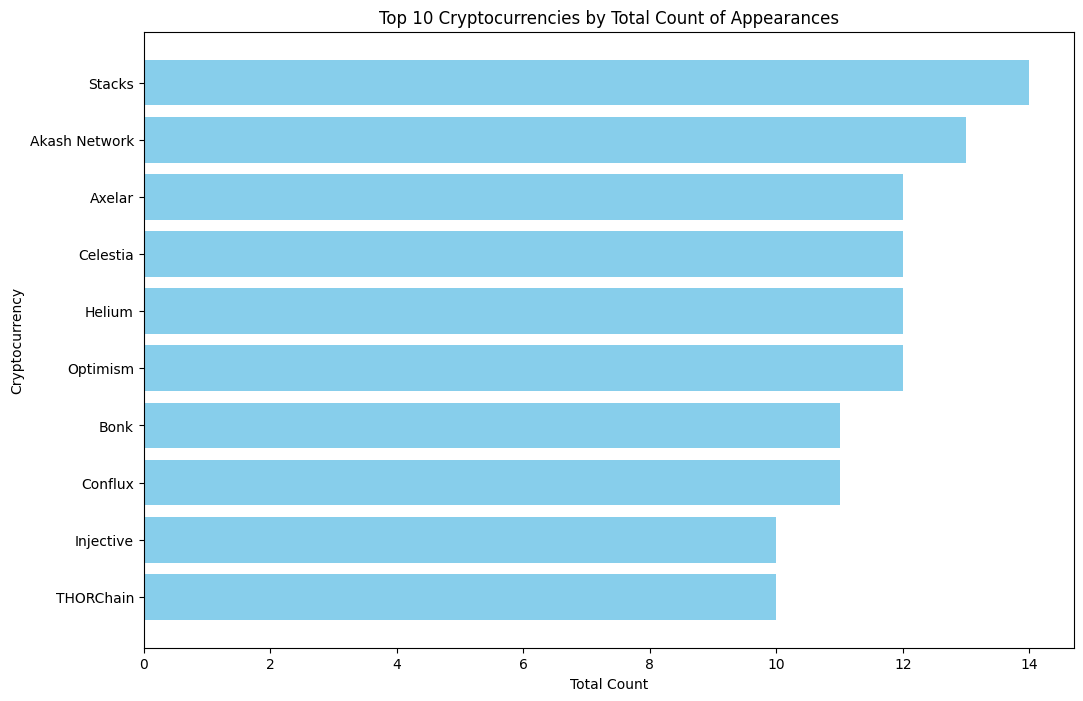

In [28]:
import matplotlib.pyplot as plt

# Load the processed CSV file
summary_df = pd.read_csv("Cryptocurrency_Gainers_Summary_Generator.csv")

# Get the top 10 cryptocurrencies by total count
top_10 = summary_df.nlargest(10, 'Total Count')

# Plot the top 10 cryptocurrencies
plt.figure(figsize=(12, 8))
plt.barh(top_10['Cryptocurrency'], top_10['Total Count'], color='skyblue')
plt.xlabel('Total Count')
plt.ylabel('Cryptocurrency')
plt.title('Top 10 Cryptocurrencies by Total Count of Appearances')
plt.gca().invert_yaxis()
plt.show()


## Conclusion

This project demonstrates web scraping, data processing, and visualization skills using Python. The steps include collecting data from a website, processing it to extract useful insights, and visualizing the results. This comprehensive analysis helps in understanding the trends and popularity of various cryptocurrencies over time.
